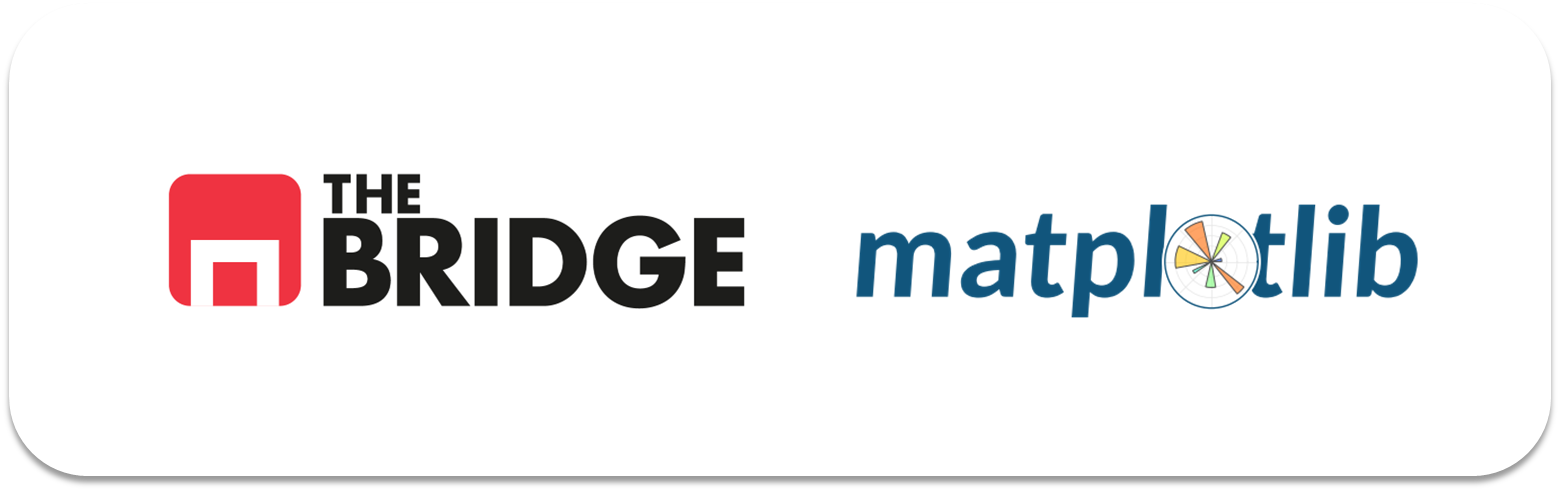

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = np.random.rand(100)

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [2]:
df= pd.read_csv("./data/california_cities.csv")

#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

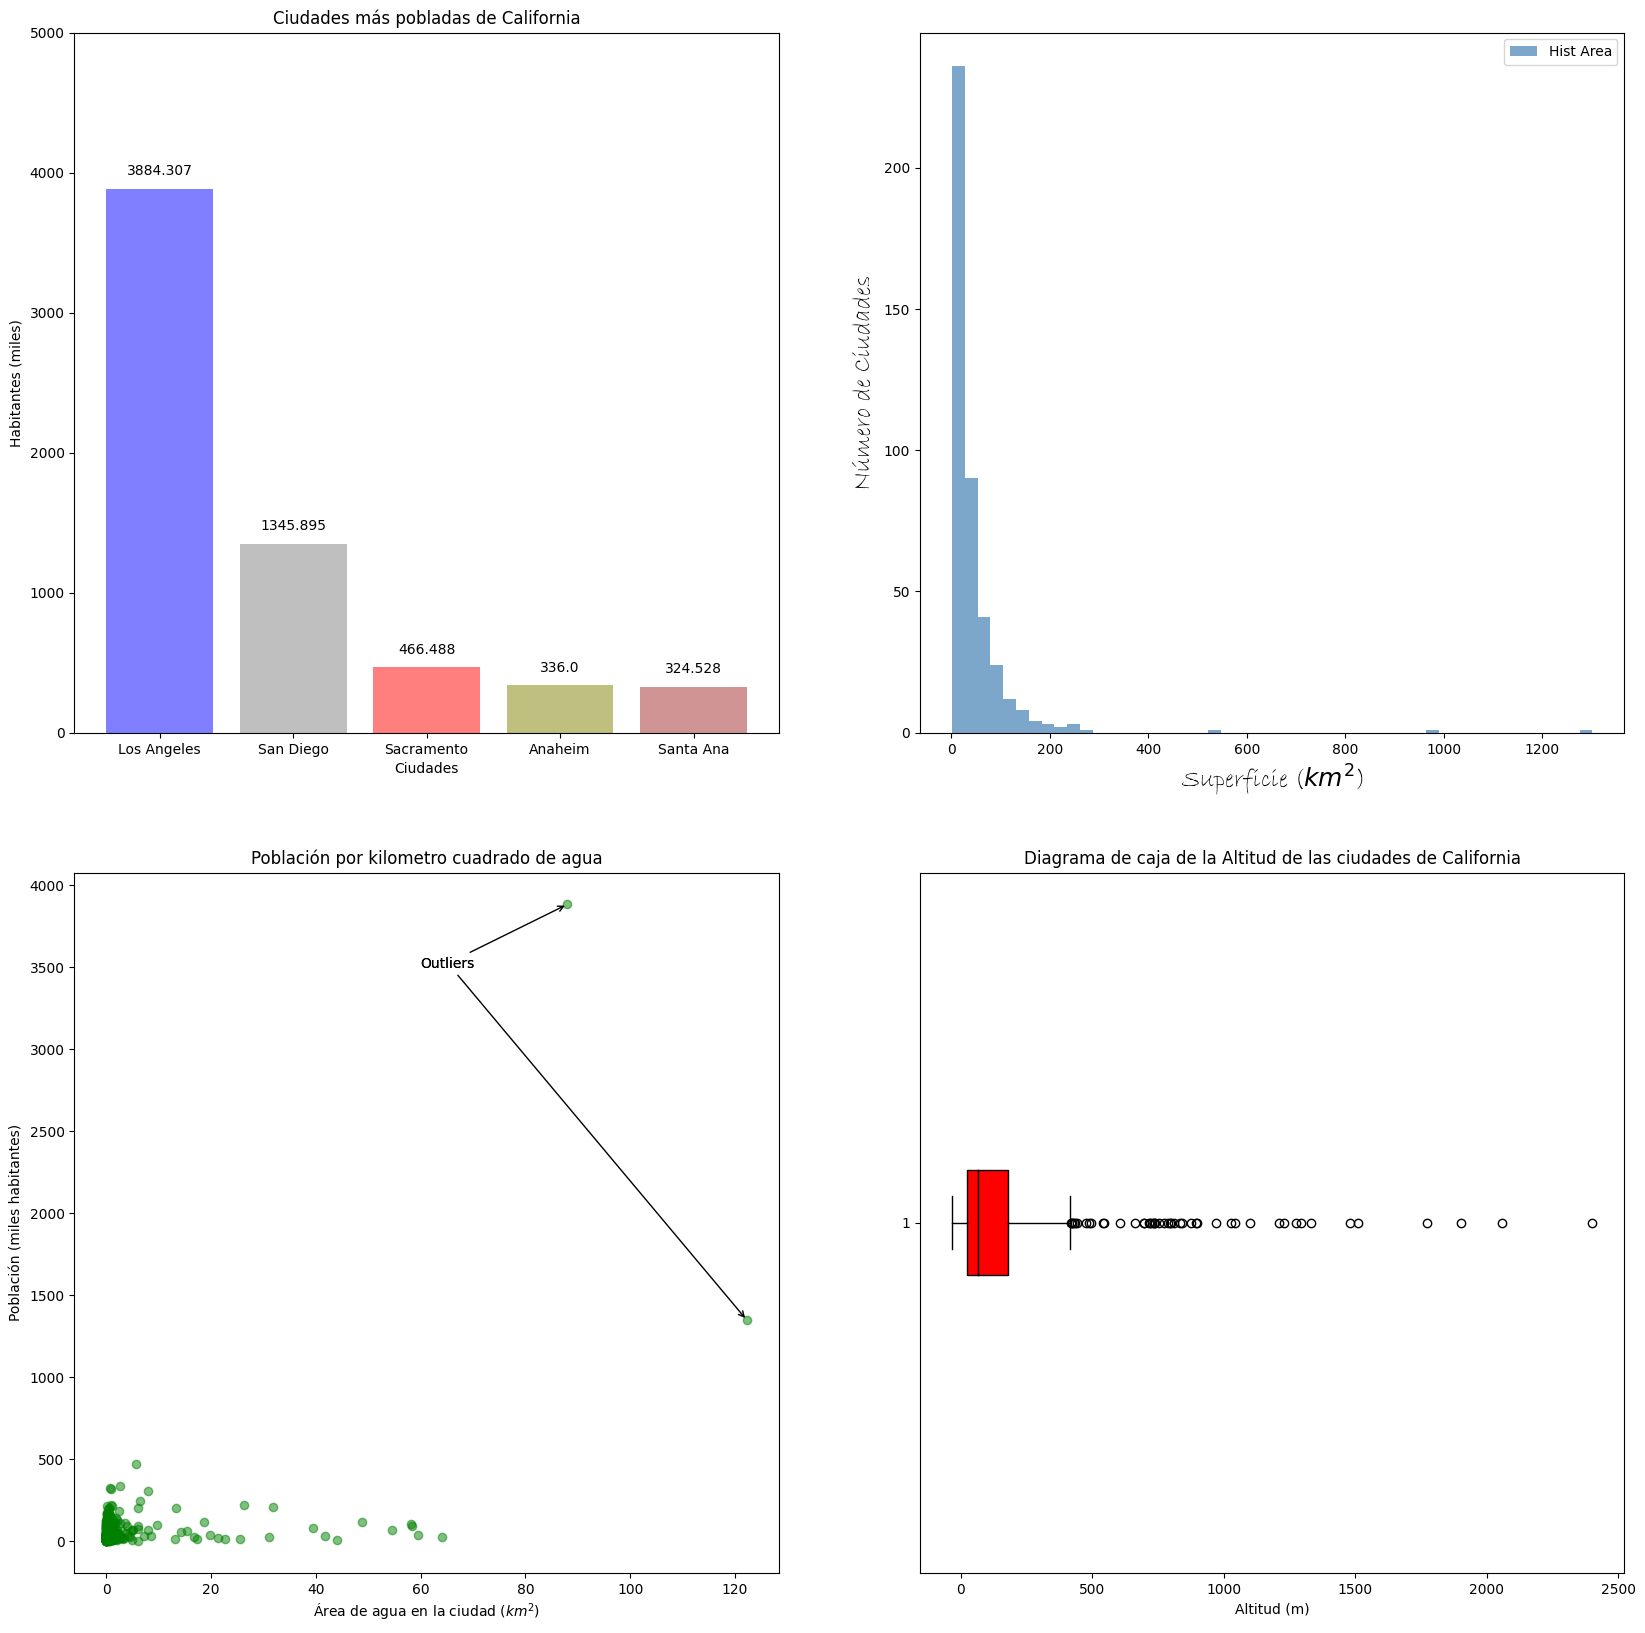

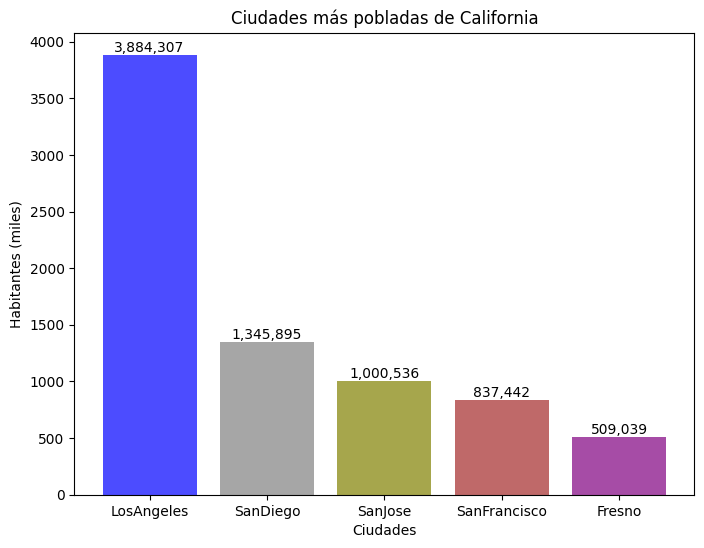

In [4]:
top_cities = df.sort_values("population_total", ascending=False).head(5)

colors = ["blue", "gray", "olive", "brown", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(
    top_cities["city"],
    top_cities["population_total"] / 1000,
    color=colors,
    alpha=0.7
)

plt.title("Ciudades más pobladas de California")
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")

for bar, value in zip(bars, top_cities["population_total"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:,}",
        ha="center",
        va="bottom"
    )

plt.show()

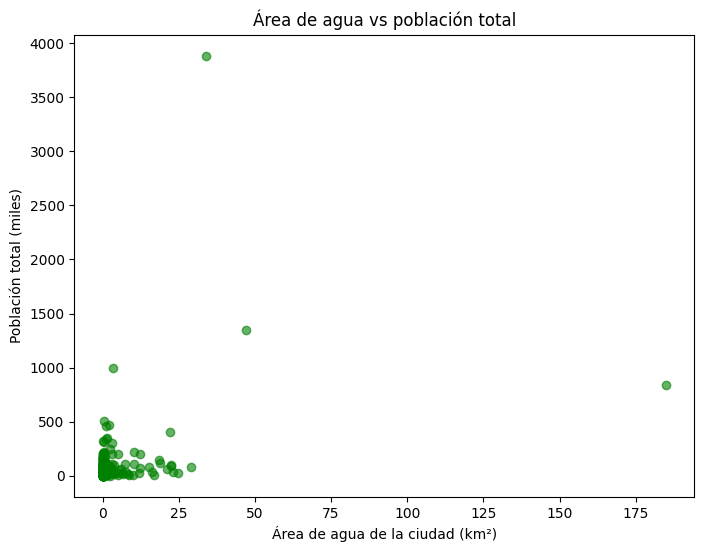

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["area_water_sq_mi"],
    df["population_total"] / 1000,
    color="green",
    alpha=0.6
)

plt.title("Área de agua vs población total")
plt.xlabel("Área de agua de la ciudad (km²)")
plt.ylabel("Población total (miles)")

plt.show()

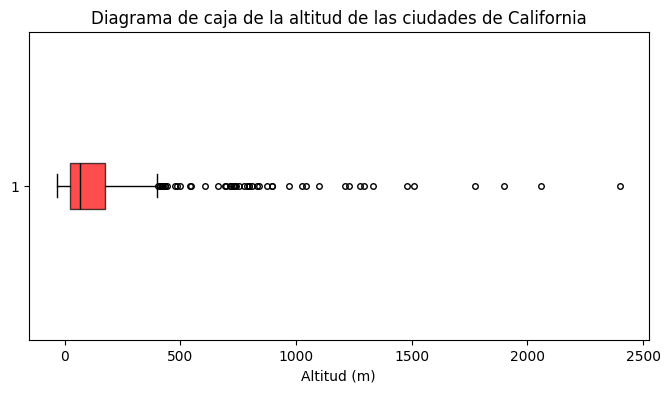

In [13]:
plt.figure(figsize=(8, 4))

elevation_clean = pd.to_numeric(
    df["elevation_m"],
    errors="coerce"
).dropna()

plt.boxplot(
    elevation_clean,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="red", alpha=0.7),
    medianprops=dict(color="black"),
    flierprops=dict(marker='o', markersize=4)
)

plt.title("Diagrama de caja de la altitud de las ciudades de California")
plt.xlabel("Altitud (m)")

plt.show()


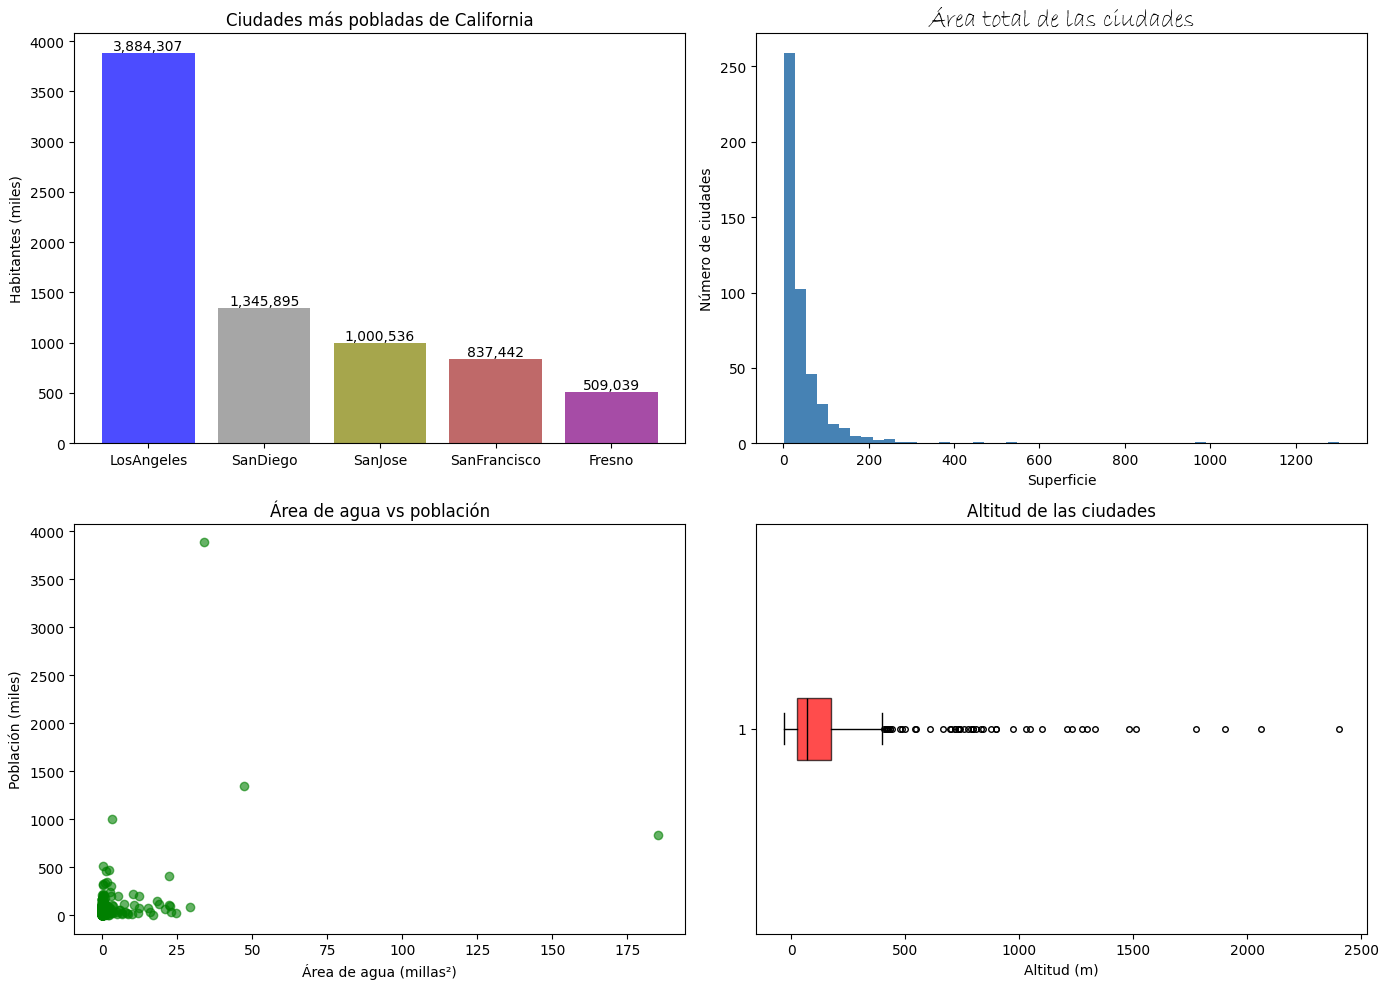

In [17]:
# Limpieza de la columna de altitud
elevation_clean = pd.to_numeric(
    df["elevation_m"],
    errors="coerce"
).dropna()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1️ Ciudades más pobladas
top_cities = df.sort_values("population_total", ascending=False).head(5)
colors = ["blue", "gray", "olive", "brown", "purple"]

bars = axes[0, 0].bar(
    top_cities["city"],
    top_cities["population_total"] / 1000,
    color=colors,
    alpha=0.7
)
axes[0, 0].set_title("Ciudades más pobladas de California")
axes[0, 0].set_ylabel("Habitantes (miles)")

for bar, value in zip(bars, top_cities["population_total"]):
    axes[0, 0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:,}",
        ha="center",
        va="bottom"
    )

# 2️ Histograma del área total
axes[0, 1].hist(
    df["area_total_km2"],
    bins=50,
    color="steelblue"
)
axes[0, 1].set_title(
    "Área total de las ciudades",
    fontname="Bradley Hand ITC",
    fontsize=18
)
axes[0, 1].set_xlabel("Superficie")
axes[0, 1].set_ylabel("Número de ciudades")

# 3️ Scatter: área de agua vs población
axes[1, 0].scatter(
    df["area_water_sq_mi"],
    df["population_total"] / 1000,
    color="green",
    alpha=0.6
)
axes[1, 0].set_title("Área de agua vs población")
axes[1, 0].set_xlabel("Área de agua (millas²)")
axes[1, 0].set_ylabel("Población (miles)")

# 4️ BOXPLOT de altitud (YA CORRECTO)
axes[1, 1].boxplot(
    elevation_clean,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="red", alpha=0.7),
    medianprops=dict(color="black"),
    flierprops=dict(marker='o', markersize=4)
)
axes[1, 1].set_title("Altitud de las ciudades")
axes[1, 1].set_xlabel("Altitud (m)")

plt.tight_layout()
plt.show()

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.